In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('pima-indians-diabetes.csv', skiprows=9, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns=['pregnant', 'glucose', 'blood', 'skin', 'insulin', 'Body mass', 'Diabetes', 'Age', 'Class']
df.head()

,pregnant,glucose,blood,skin,insulin,Body mass,Diabetes,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(df['Class'].value_counts())

0    500
1    268
Name: Class, dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glucose    768 non-null    int64  
 2   blood      768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   Body mass  768 non-null    float64
 6   Diabetes   768 non-null    float64
 7   Age        768 non-null    int64  
 8   Class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X, y

(     pregnant  glucose  blood  skin  insulin  Body mass  Diabetes  Age
 0           6      148     72    35        0       33.6     0.627   50
 1           1       85     66    29        0       26.6     0.351   31
 2           8      183     64     0        0       23.3     0.672   32
 3           1       89     66    23       94       28.1     0.167   21
 4           0      137     40    35      168       43.1     2.288   33
 ..        ...      ...    ...   ...      ...        ...       ...  ...
 763        10      101     76    48      180       32.9     0.171   63
 764         2      122     70    27        0       36.8     0.340   27
 765         5      121     72    23      112       26.2     0.245   30
 766         1      126     60     0        0       30.1     0.349   47
 767         1       93     70    31        0       30.4     0.315   23
 
 [768 rows x 8 columns],
 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=2021
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [9]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)

    print('정확도: {0: .4f}, 정밀도: {1: .4f}, 재현율: {2: .4f}, \
        F1: {3: .4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [10]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()                       # 학습
lr_clf.fit(X_train, y_train)                    
pred = lr_clf.predict(X_test)                       # 예측
pred_proba = lr_clf.predict_proba(X_test)[:, 1]     # 평가

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[91  9]
 [21 33]]
정확도:  0.8052, 정밀도:  0.7857, 재현율:  0.6111,         F1:  0.6875, AUC:0.8293


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

NameError: name 'precision_recall_curve_plot' is not defined

In [ ]:
df.describe()       # min값이 0으로 되어있는 feature가 존재

,pregnant,glucose,blood,skin,insulin,Body mass,Diabetes,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

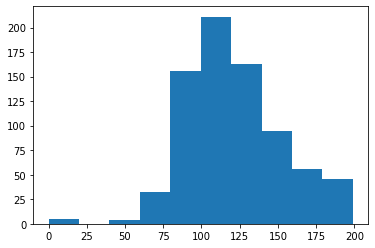

In [ ]:
plt.hist(df.glucose, bins=10)       # histogram을 그려서 확인해보자

In [14]:
# min() 값이 0으로 되어 있는 feature에 대해 
#   0 값의 건수
#   전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인

# df.describe()에서 min()이 0이 나온 feature 확인
zero_features = ['pregnant', 'glucose', 'blood', 'skin', 'insulin', 'Body mass']

# 전체 데이터 건수
total_cnt = df.glucose.count()  # df.shape로 해도 될 것 같다

# feature 별로 데이터 값이 0인 데이터 건수를 추출, 퍼센트 계산
for feature in zero_features:
    zero_count = df[df[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2: .2f} %'.format(feature, zero_count, 100*zero_count/total_cnt))


pregnant 0 건수는 111, 퍼센트는  14.45 %
glucose 0 건수는 5, 퍼센트는  0.65 %
blood 0 건수는 35, 퍼센트는  4.56 %
skin 0 건수는 227, 퍼센트는  29.56 %
insulin 0 건수는 374, 퍼센트는  48.70 %
Body mass 0 건수는 11, 퍼센트는  1.43 %


In [ ]:
df.columns

Index(['pregnant', 'glucose', 'blood', 'skin', 'insulin', 'Body mass',
       'Diabetes', 'Age', 'Class'],
      dtype='object')

In [ ]:
total_cnt = df.glucose.count()
total_cnt

768

In [ ]:
# 0인 데이터가 너무 많을 경우, 일괄적으로 삭제할 경우에는 학습 수행에 어려움이 있다. => 0인 값을 평균값으로 대체
# 0인 데이터가 평균값으로 채워지지 않는 게 이상함
df[zero_features].fillna(df[zero_features].mean(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [15]:
mean_zero_features = df[zero_features].mean()
df[zero_features] = df[zero_features].replace(0, mean_zero_features)

In [16]:
df

,pregnant,glucose,blood,skin,insulin,Body mass,Diabetes,Age,Class
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
X = df.iloc[:, :-1]
y = df.Class 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=2021, test_size=0.2
)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[92  8]
 [22 32]]
정확도:  0.8052, 정밀도:  0.8000, 재현율:  0.5926,         F1:  0.6809, AUC:0.8348


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
threshold = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), threshold)

NameError: name 'get_eval_by_threshold' is not defined

In [20]:
binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

NameError: name 'Binarizer' is not defined